GridBox(children=(Dropdown(description='Type Selector', layout=Layout(width='200px'), options=(('', ''), ('Rev…

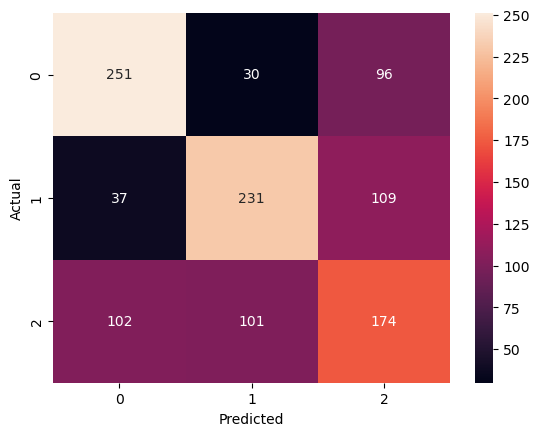

Captured output: {'budget': 100000000.0, 'runtime': 109.0, 'genres_0_name': 'Thriller', 'genres_1_name': '', 'genres_2_name': ''}
revenue

Balanced accuracy score: 0.5800176834659593

Classification report:
              precision    recall  f1-score   support

        High       0.64      0.67      0.65       377
         Low       0.64      0.61      0.63       377
      Medium       0.46      0.46      0.46       377

    accuracy                           0.58      1131
   macro avg       0.58      0.58      0.58      1131
weighted avg       0.58      0.58      0.58      1131


Feature Importance: 
[(0.40801798618201146, 'budget'), (0.2584046715262534, 'runtime'), (0.012884816874429293, 'genres_2_name_Thriller'), (0.011100759709709068, 'genres_2_name_Drama'), (0.01096314177690624, 'genres_0_name_Action'), (0.010911828568979423, 'genres_1_name_Drama'), (0.01049096823110188, 'genres_1_name_Comedy'), (0.010460841783722433, 'genres_0_name_Comedy'), (0.010012679823864864, 'genres_0_name

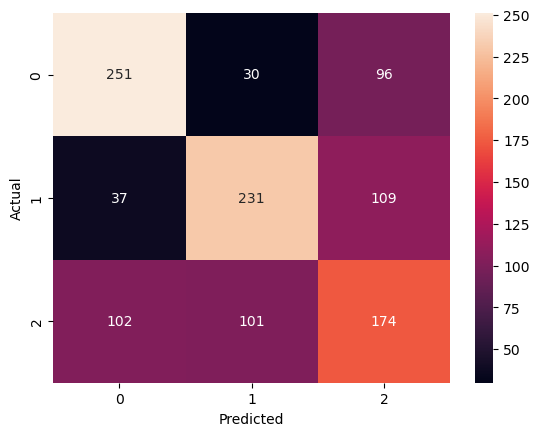

Captured output: {'budget': 100000000.0, 'runtime': 109.0, 'genres_0_name': 'Thriller', 'genres_1_name': 'Action', 'genres_2_name': 'Action'}
revenue

Balanced accuracy score: 0.5800176834659593

Classification report:
              precision    recall  f1-score   support

        High       0.64      0.67      0.65       377
         Low       0.64      0.61      0.63       377
      Medium       0.46      0.46      0.46       377

    accuracy                           0.58      1131
   macro avg       0.58      0.58      0.58      1131
weighted avg       0.58      0.58      0.58      1131


Feature Importance: 
[(0.40801798618201146, 'budget'), (0.2584046715262534, 'runtime'), (0.012884816874429293, 'genres_2_name_Thriller'), (0.011100759709709068, 'genres_2_name_Drama'), (0.01096314177690624, 'genres_0_name_Action'), (0.010911828568979423, 'genres_1_name_Drama'), (0.01049096823110188, 'genres_1_name_Comedy'), (0.010460841783722433, 'genres_0_name_Comedy'), (0.010012679823864864, 'g

In [2]:
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import Layout, GridBox
from lib.model_lib import run_on_rfc_model
import io
import sys

type_selector_options = ['', 'revenue', 'popularity', 'vote_average']
selector_columns = ['budget', 'runtime', 'genres_0_name', 'genres_1_name', 'genres_2_name']
genre_options = ['', 'Animation', 'Action', 'Science Fiction', 'Horror', 'Comedy', 'Drama', 'Romance', 'Fantasy', 'Thriller', 'Crime', 'TV Movie', 'Family', 'Adventure', 'War', 'Mystery', 'Documentary', 'History', 'Western', 'Music']


selectors = {}
for column in selector_columns:
  if 'genres' in column:
    genre_index = int(column.split('_')[1]) + 1
    selectors[column] = widgets.Dropdown(
      options=genre_options,
      description=f'Genre {genre_index}',
      disabled=False,
      layout=Layout(width='200px'),
      id=column
    )
  else:
    selectors[column] = widgets.FloatText(
      description=column.capitalize(),
      disabled=False,
      layout=Layout(width='200px'),
      id=column
    )

type_selector = widgets.Dropdown(
  options=type_selector_options,
  description='Type Selector',
  disabled=False,
  layout=Layout(width='200px')
)

type_selector.options = [(option.replace('_', ' ').capitalize(), option) for option in type_selector_options]
selectors['type_selector'] = type_selector

predict_button = widgets.Button(
  description='Predict',
  disabled=False,
  button_style='success',  # 'success', 'info', 'warning', 'danger' or ''
  tooltip='Click to predict',
  icon='check'  # (FontAwesome names without the `fa-` prefix)
)

def on_button_click(b):
  old_stdout = sys.stdout
  sys.stdout = buffer = io.StringIO()
  
  selected_values = {column: selectors[column].value for column in selector_columns}
  print(selected_values)
  print(selectors['type_selector'].value)
  selected_values['type_selector'] = type_selector.value

  columns_to_remove = ['roi', 'profit']
  match selectors['type_selector'].value:
    case 'revenue':
      columns_to_remove = columns_to_remove + ['vote_average', 'popularity']
    case 'popularity':
      columns_to_remove = columns_to_remove + ['revenue', 'vote_average']
    case 'vote_average':
      columns_to_remove = columns_to_remove + ['popularity', 'revenue']

  run_on_rfc_model([selected_values], selectors['type_selector'].value, columns_to_remove)

  # Restore the original stdout
  sys.stdout = old_stdout

  # Get the captured output
  output = buffer.getvalue()
  print("Captured output:", output)

predict_button.on_click(on_button_click)

grid = GridBox(
  children= [type_selector] + [selectors[column] for column in selector_columns] + [predict_button],
  layout=Layout(
    width='100%',
    grid_template_columns='repeat(3, 200px)',
    grid_gap='10px 10px'
  )
)

display(grid)

selected_values = {column: selectors[column].value for column in selector_columns}